This cell imports necessary libraries and modules:

- `numpy` (as `np`): For numerical operations.
- `matplotlib.pyplot` (as `plt`): For plotting graphs.
- `time`: For measuring time.
- `threading`: For creating and managing threads.
- `pandas` (as `pd`): For data manipulation and analysis.
- `psutil`: For system monitoring, including CPU usage.
- `tabulate`: For creating formatted tables from data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import pandas as pd
import psutil
from tabulate import tabulate

This cell defines a function `multiply_matrices` that performs matrix multiplication using multiple threads. It calculates the average time taken to perform matrix multiplication with a specified number of threads.

In [4]:
def multiply_matrices(constant_matrix, num_threads):
    results = []
    for _ in range(20):  
        start_time = time.time()
        threads = []
        batch_size = 100 // num_threads
        for i in range(0, 100, batch_size):
            thread = threading.Thread(target=perform_multiplication, args=(constant_matrix, results, i, min(i+batch_size, 100)))
            threads.append(thread)
            thread.start()
        for thread in threads:
            thread.join()
        end_time = time.time()
        results.append(end_time - start_time)
    return np.mean(results)

This cell defines a helper function `perform_multiplication` that performs matrix multiplication for a batch of matrices. It takes a constant matrix, a list to store results, and the start and end indices of the batch.

In [5]:
def perform_multiplication(constant_matrix, results, start_idx, end_idx):
    for i in range(start_idx, end_idx):
        random_matrix = np.random.rand(1000, 1000)
        result = np.matmul(random_matrix, constant_matrix)

This cell generates a random constant matrix of size 1000x1000 using `numpy`.

In [6]:
constant_matrix = np.random.rand(1000, 1000)

This cell calculates the average time taken for matrix multiplication using different numbers of threads (1 to 16). It prints and displays the result table using `tabulate`.

In [7]:
thread_counts = list(range(1, 17))  
times = []
data = []
for num_threads in thread_counts:
    avg_time = multiply_matrices(constant_matrix, num_threads)
    times.append(avg_time)
    data.append([f"T={num_threads}", f"{avg_time:.2f}"])

print("Result table:")
print(tabulate(data, headers=["Threads", "Time Taken (Sec)"], tablefmt="pipe"))

Result table:
| Threads   |   Time Taken (Sec) |
|:----------|-------------------:|
| T=1       |               1.54 |
| T=2       |               1.14 |
| T=3       |               1.11 |
| T=4       |               1.1  |
| T=5       |               1.18 |
| T=6       |               1.15 |
| T=7       |               1.03 |
| T=8       |               1.09 |
| T=9       |               1.08 |
| T=10      |               1.17 |
| T=11      |               1.04 |
| T=12      |               1.05 |
| T=13      |               1.38 |
| T=14      |               1.18 |
| T=15      |               1.06 |
| T=16      |               1.08 |


This cell calculates additional metrics such as maximum time, minimum time, and standard deviation of execution times. It prints a summary of these metrics and appends them to the result table. Finally, it plots the execution time graph and includes horizontal lines representing max, min, and mean times.


Summary:
Maximum Time: 1.54 seconds
Minimum Time: 1.03 seconds
Standard Deviation: 0.13 seconds

Result table:
| Threads   |   Time Taken (Sec) |
|:----------|-------------------:|
| T=1       |               1.54 |
| T=2       |               1.14 |
| T=3       |               1.11 |
| T=4       |               1.1  |
| T=5       |               1.18 |
| T=6       |               1.15 |
| T=7       |               1.03 |
| T=8       |               1.09 |
| T=9       |               1.08 |
| T=10      |               1.17 |
| T=11      |               1.04 |
| T=12      |               1.05 |
| T=13      |               1.38 |
| T=14      |               1.18 |
| T=15      |               1.06 |
| T=16      |               1.08 |
| Max       |               1.54 |
| Min       |               1.03 |
| Std Dev   |               0.13 |


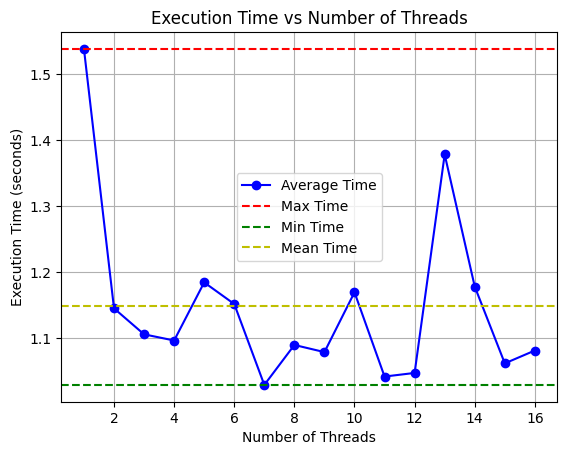

In [10]:
max_time = max(times)
min_time = min(times)
std_dev = np.std(times)

print("\nSummary:")
print(f"Maximum Time: {max_time:.2f} seconds")
print(f"Minimum Time: {min_time:.2f} seconds")
print(f"Standard Deviation: {std_dev:.2f} seconds")

data.append(["Max", f"{max_time:.2f}"])
data.append(["Min", f"{min_time:.2f}"])
data.append(["Std Dev", f"{std_dev:.2f}"])

print("\nResult table:")
print(tabulate(data, headers=["Threads", "Time Taken (Sec)"], tablefmt="pipe"))

plt.plot(thread_counts, times, color='b', marker='o', label='Average Time')
plt.axhline(y=max_time, color='r', linestyle='--', label='Max Time')
plt.axhline(y=min_time, color='g', linestyle='--', label='Min Time')
plt.axhline(y=np.mean(times), color='y', linestyle='--', label='Mean Time')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Threads')
plt.legend()
plt.grid(True)
plt.show()

This cell monitors CPU usage using `psutil` and plots the CPU usage graph using `matplotlib.pyplot`. It shows the percentage usage of each CPU core over time.


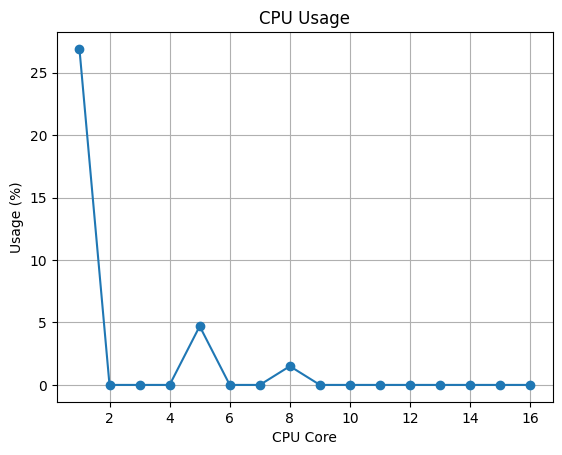

In [9]:
cpu_usage = psutil.cpu_percent(interval=1, percpu=True)
plt.plot(range(1, len(cpu_usage) + 1), cpu_usage, marker='o')
plt.title('CPU Usage')
plt.xlabel('CPU Core')
plt.ylabel('Usage (%)')
plt.grid(True)
plt.show()